In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:


# Load the dataset

data = pd.read_csv('spotify2023.csv', encoding = 'unicode_escape', engine ='python')

df=data.copy()
df.describe()


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ï»¿track_name         953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
df=pd.DataFrame(df)
df

,ï»¿track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,drake,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [6]:
#searching for Null values
print("Null values count :")
print(df.isnull().sum()) #sum of Null values in a colum

Null values count :
ï»¿track_name            0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


<Axes: >

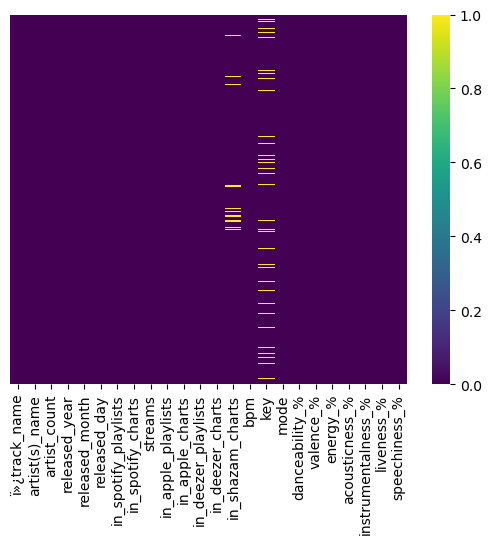

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [8]:
#filling null values
print (df)
df.fillna(0, inplace = True)    # filling with 0 value
df

                           ï»¿track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                  drake         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

,ï»¿track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,drake,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [9]:
#searching for Null values
print("Null values count :")
print(df.isnull().sum()) #sum of Null values in a colum





Null values count :
ï»¿track_name           0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


<Axes: >

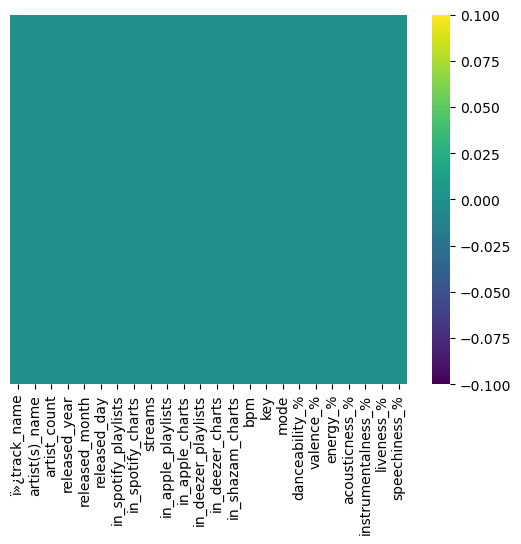

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [11]:
df[df.duplicated()]

,ï»¿track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


**Music Analysis  Explore Audio Features**

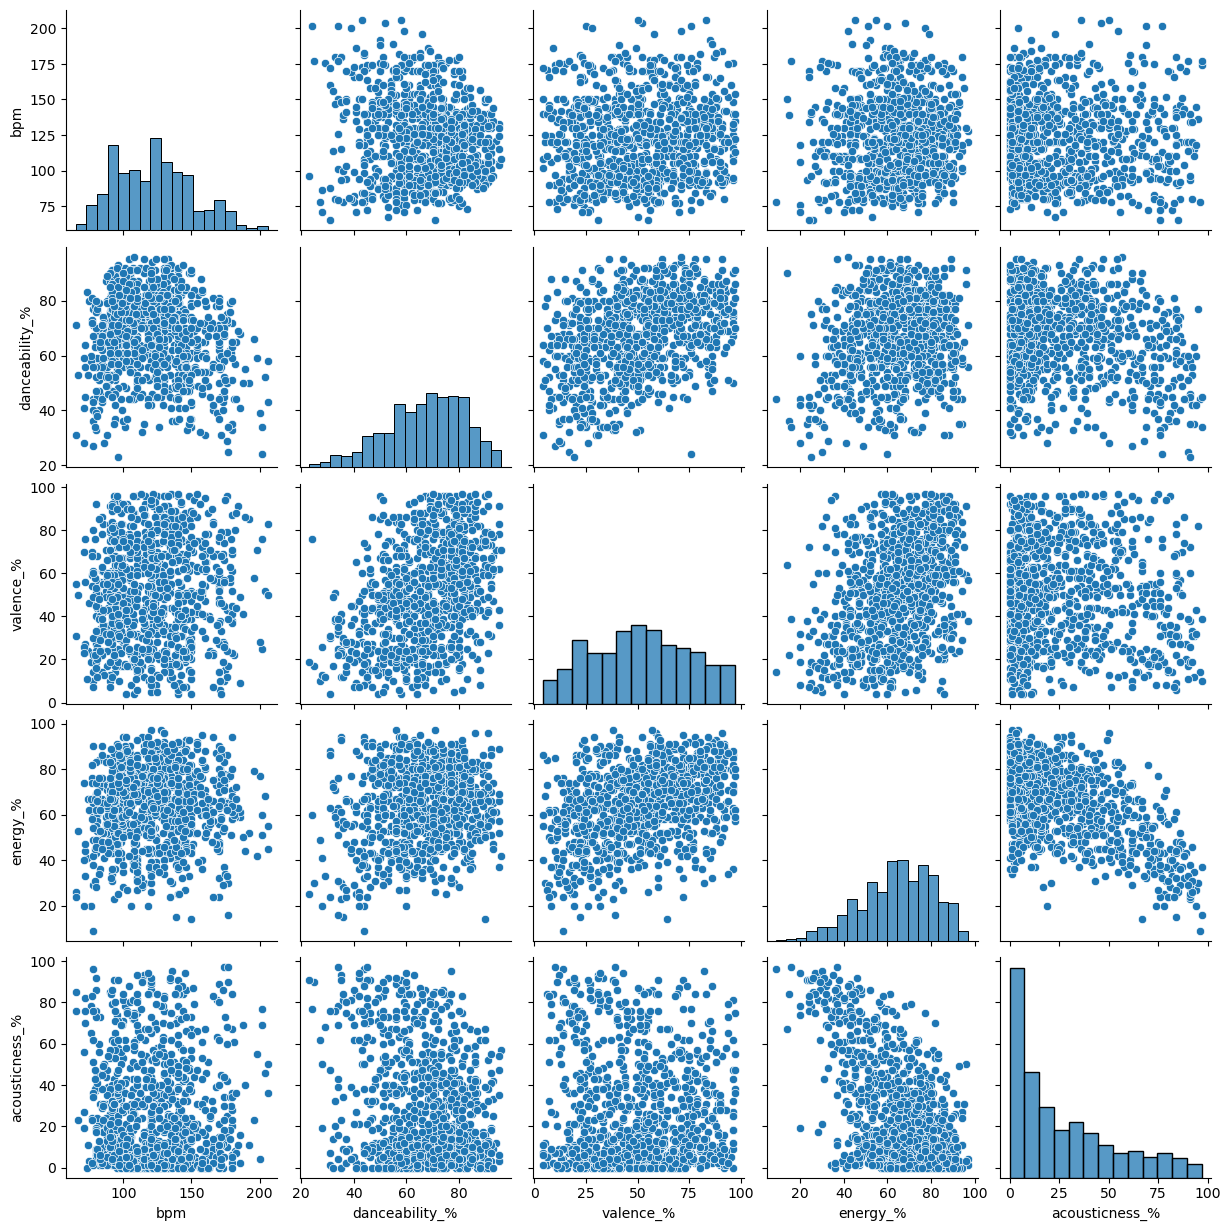

In [12]:
# Explore audio feature distributions
audio_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']
sns.pairplot(df[audio_features])
plt.show()


<Axes: ylabel='Frequency'>

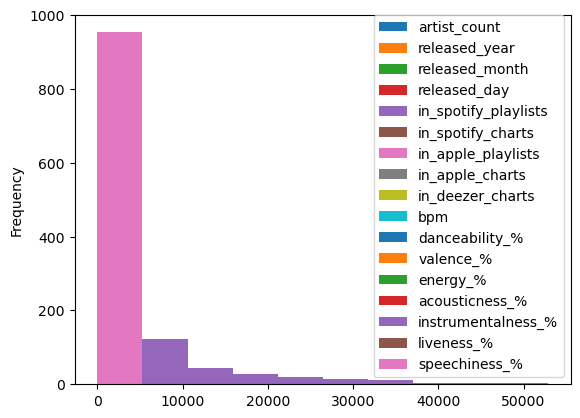

In [13]:
df.plot.hist()

<Axes: ylabel='Frequency'>

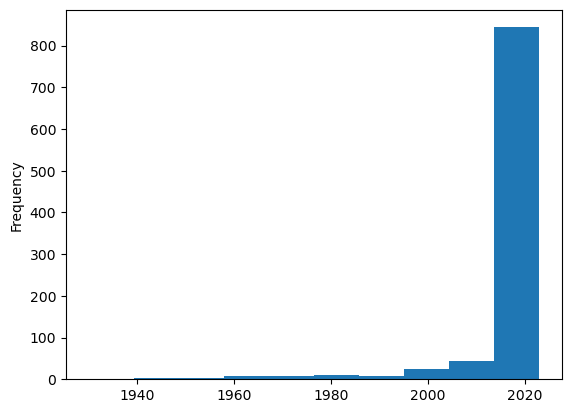

In [14]:
df.released_year.plot.hist()

Platform Comparison

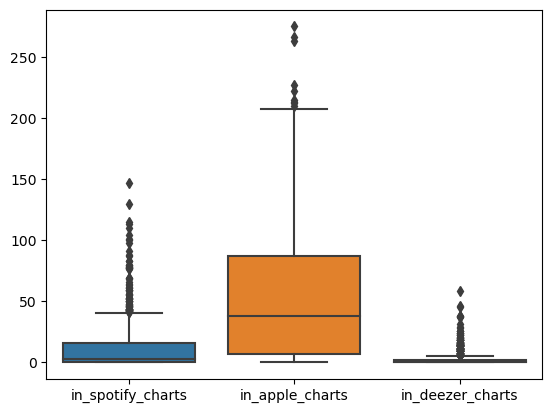

In [15]:
# Compare song popularity across different platforms
platform_metrics = ['streams', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']
platform_comparison = df[platform_metrics]

# You can use visualizations or statistical tests to compare these metrics across platforms
# For example, a bar chart or boxplot to visualize differences
sns.boxplot(data=platform_comparison )
plt.show()


Artist Impact

In [16]:
# Step 4: Artist Impact

# Check data types of relevant columns
print(df[['artist_count', 'streams']].dtypes)

# Convert 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Drop rows with missing values in 'streams' column
df = df.dropna(subset=['streams'])

# Check data types again
print(df[['artist_count', 'streams']].dtypes)

# Now, perform linear regression
from sklearn.linear_model import LinearRegression

# Prepare data
X = df[['artist_count']]
y = df['streams']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print("Coefficient:", model.coef_)


artist_count     int64
streams         object
dtype: object
artist_count      int64
streams         float64
dtype: object
Coefficient: [-86591906.79160373]


Temporal Trends

<Axes: xlabel='released_year,released_month'>

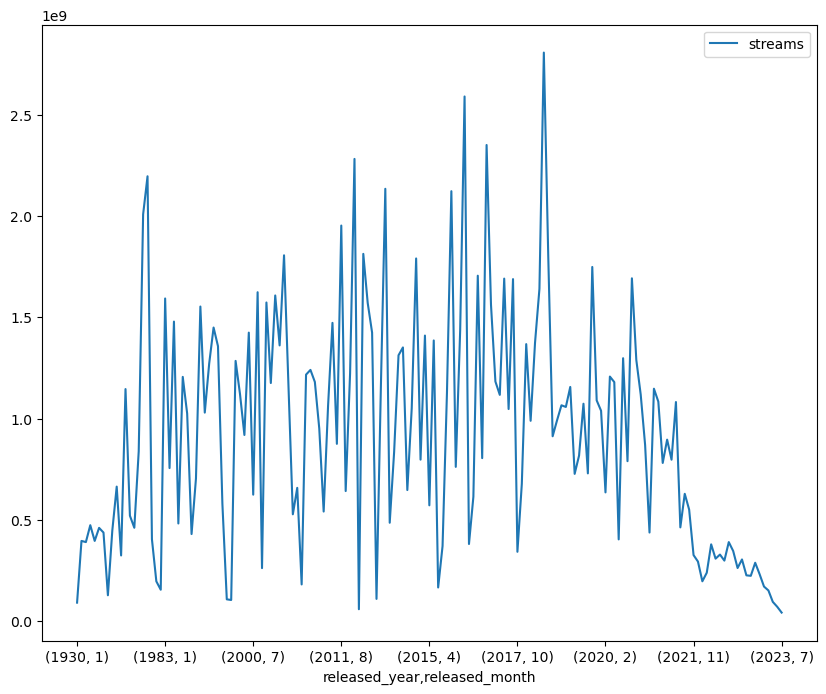

In [17]:
# Identify temporal trends
temporal_metrics = df[['released_year', 'released_month', 'streams']]

# Group by year and month and calculate the average streams
temporal_trends = temporal_metrics.groupby(['released_year', 'released_month']).mean()

# Plot the trends
temporal_trends.plot(kind='line', y='streams',figsize=(10, 8))


**Cross-Platform Presence**

C:\Users\DELL\AppData\Local\Temp\ipykernel_9332\3586548304.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  platform_comparison.mean().plot(kind='bar')


<Axes: >

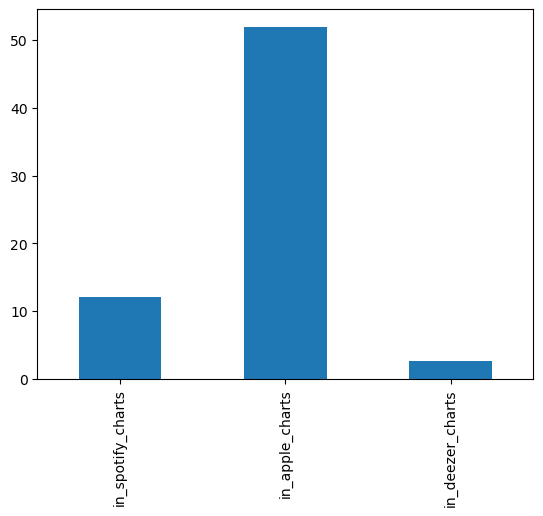

In [18]:
# Investigate how songs perform across different streaming services
platform_comparison = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]

# Plot a bar chart or use descriptive statistics to compare
platform_comparison.mean().plot(kind='bar')


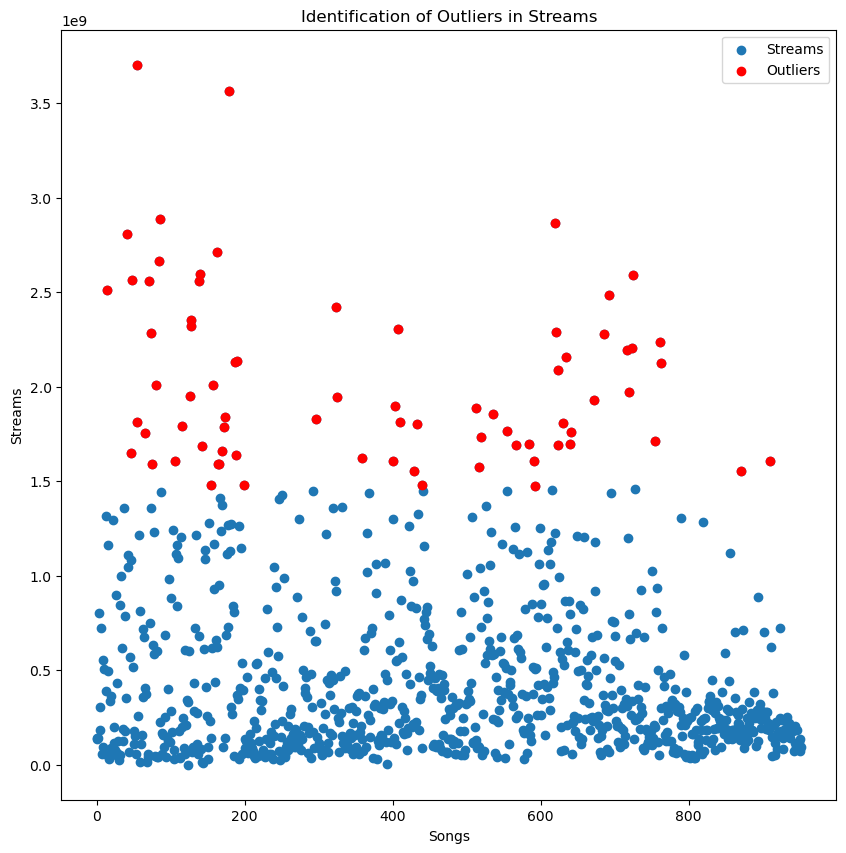

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'streams' is the column you want to analyze
streams_data = df['streams']

# Calculate the interquartile range (IQR)
Q1 = streams_data.quantile(0.25)
Q3 = streams_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (streams_data < lower_bound) | (streams_data > upper_bound)

# Visualize outliers using a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(df.index, streams_data, label='Streams')
plt.scatter(df.index[outliers], streams_data[outliers], color='red', label='Outliers')

# Add labels and title
plt.xlabel('Songs')
plt.ylabel('Streams')
plt.title('Identification of Outliers in Streams')

# Show the plot
plt.legend()
plt.show()


Mean Squared Error: 3.031636739827923e+17
R-squared: -0.23845009073466183


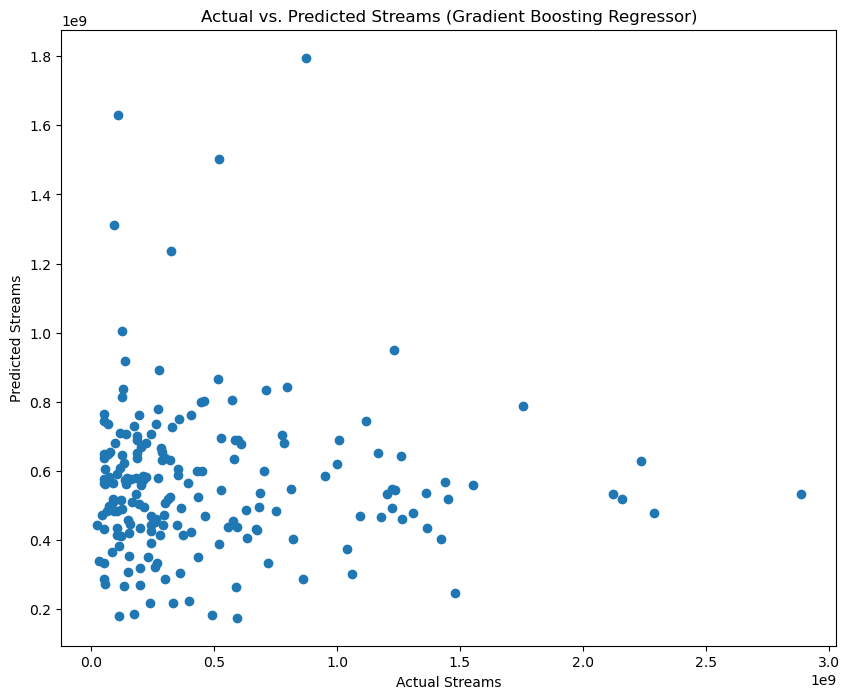

In [20]:


# Assuming 'streams' is the target variable and 'bpm', 'danceability_%', 'valence_%', 'energy_%' are the features
X = df[['bpm', 'danceability_%', 'valence_%', 'energy_%']]
y = df['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predicted vs. actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs. Predicted Streams (Gradient Boosting Regressor)')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9332\1055722154.py:5: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  platform_counts = platform_metrics.sum()


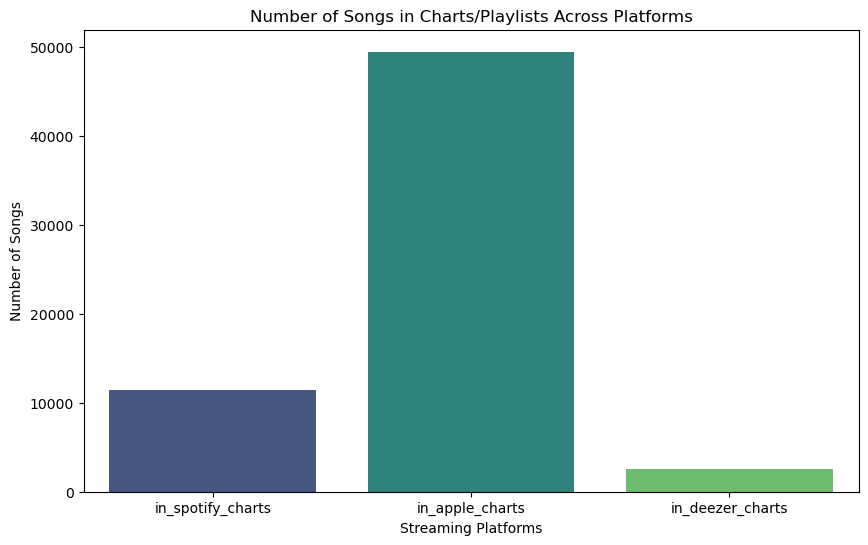

In [21]:


# Assuming you have columns like 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'
platform_metrics = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]

# Count the number of songs in each platform's charts
platform_counts = platform_metrics.sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
plt.xlabel('Streaming Platforms')
plt.ylabel('Number of Songs')
plt.title('Number of Songs in Charts/Playlists Across Platforms')
plt.show()


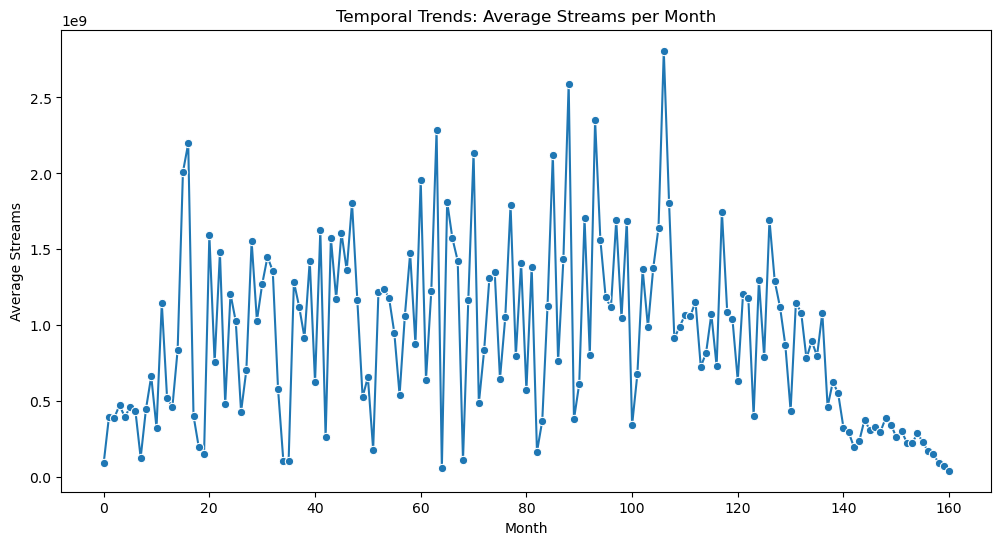

In [22]:

# Assuming you have columns like 'streams', 'released_year', and 'released_month'
temporal_metrics = df[['streams', 'released_year', 'released_month']]

# Group by year and month and calculate the average streams
monthly_trends = temporal_metrics.groupby(['released_year', 'released_month']).mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trends.index, y=monthly_trends['streams'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Streams')
plt.title('Temporal Trends: Average Streams per Month')
plt.show()


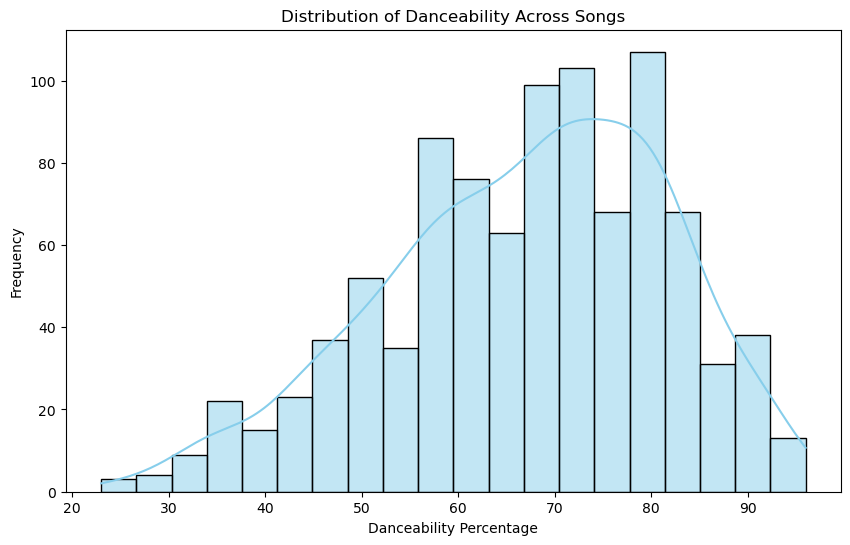

In [23]:

# Assuming you have a column like 'danceability_%' representing the danceability percentage
danceability_data = df['danceability_%']

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(danceability_data, bins=20, kde=True, color='skyblue')
plt.xlabel('Danceability Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability Across Songs')
plt.show()


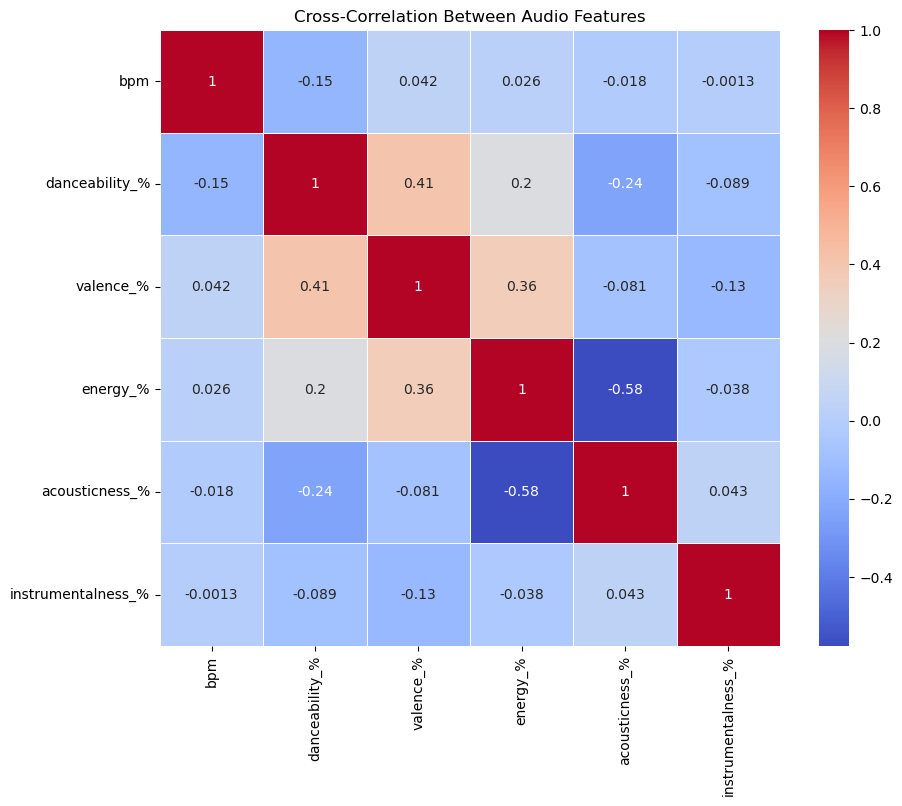

In [24]:

# Assuming you have columns for various audio features
audio_features = df[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']]

# Calculate the cross-correlation matrix
correlation_matrix = audio_features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Cross-Correlation Between Audio Features')
plt.show()


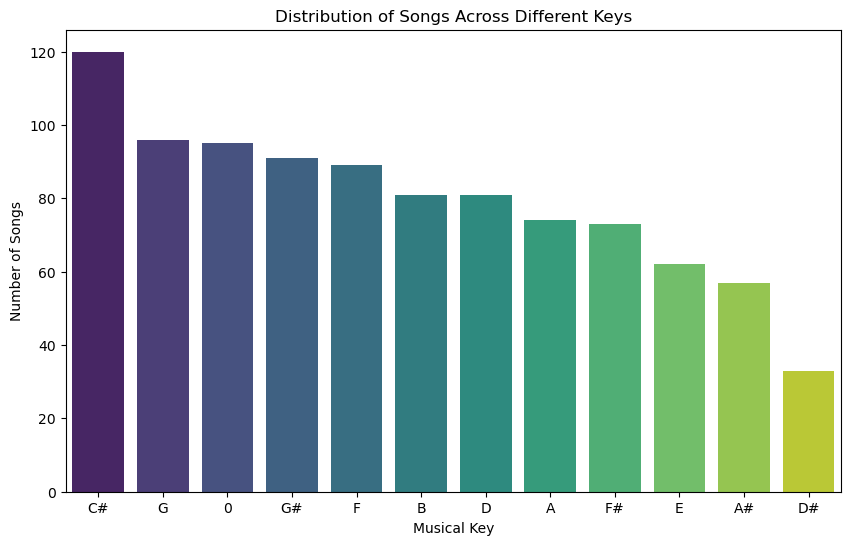

In [25]:


# Assuming you have a column like 'key' representing the musical key of each song
key_counts = df['key'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=key_counts.index, y=key_counts.values, palette='viridis')
plt.xlabel('Musical Key')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs Across Different Keys')
plt.show()


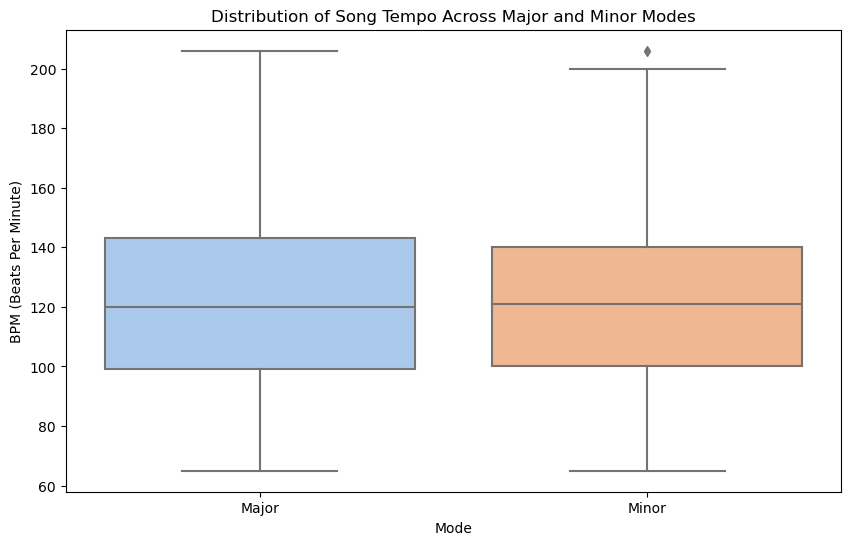

In [26]:


# Assuming you have columns like 'mode' and 'bpm' in your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='mode', y='bpm', data=df, palette='pastel')
plt.xlabel('Mode')
plt.ylabel('BPM (Beats Per Minute)')
plt.title('Distribution of Song Tempo Across Major and Minor Modes')
plt.show()


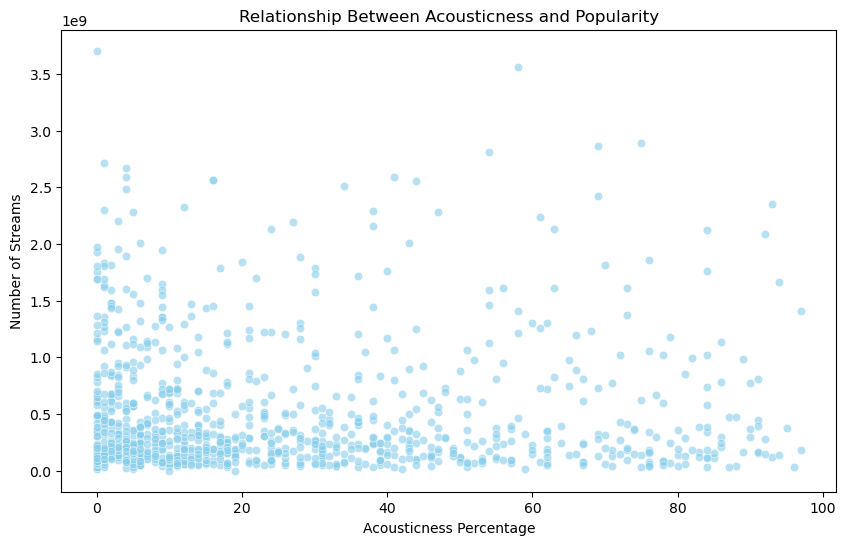

In [27]:


# Assuming you have columns like 'acousticness_%' and 'streams' in your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acousticness_%', y='streams', data=df, alpha=0.6, color='skyblue')
plt.xlabel('Acousticness Percentage')
plt.ylabel('Number of Streams')
plt.title('Relationship Between Acousticness and Popularity')
plt.show()


<Figure size 1000x600 with 0 Axes>

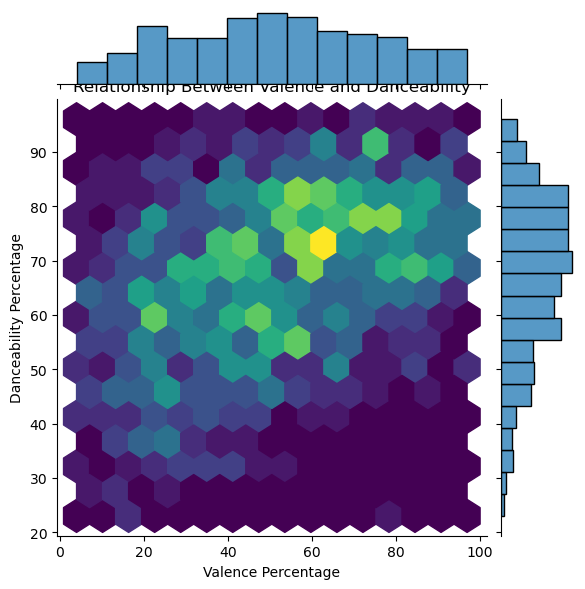

In [28]:


# Assuming you have columns like 'valence_%' and 'danceability_%' in your DataFrame
plt.figure(figsize=(10, 6))
sns.jointplot(x='valence_%', y='danceability_%', data=df, kind='hex', cmap='viridis')
plt.xlabel('Valence Percentage')
plt.ylabel('Danceability Percentage')
plt.title('Relationship Between Valence and Danceability')
plt.show()


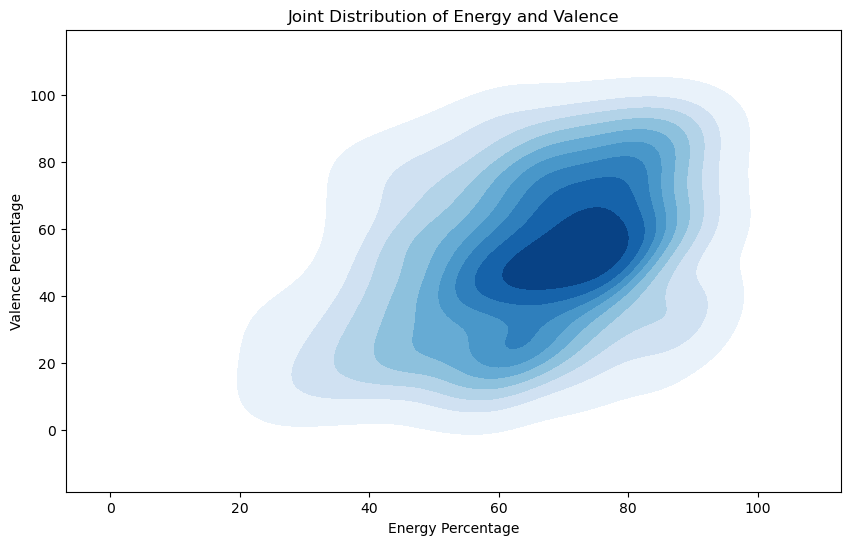

In [29]:


# Assuming you have columns like 'energy_%' and 'valence_%' in your DataFrame
plt.figure(figsize=(10, 6))
sns.kdeplot(x='energy_%', y='valence_%', data=df, cmap='Blues', fill=True)
plt.xlabel('Energy Percentage')
plt.ylabel('Valence Percentage')
plt.title('Joint Distribution of Energy and Valence')
plt.show()


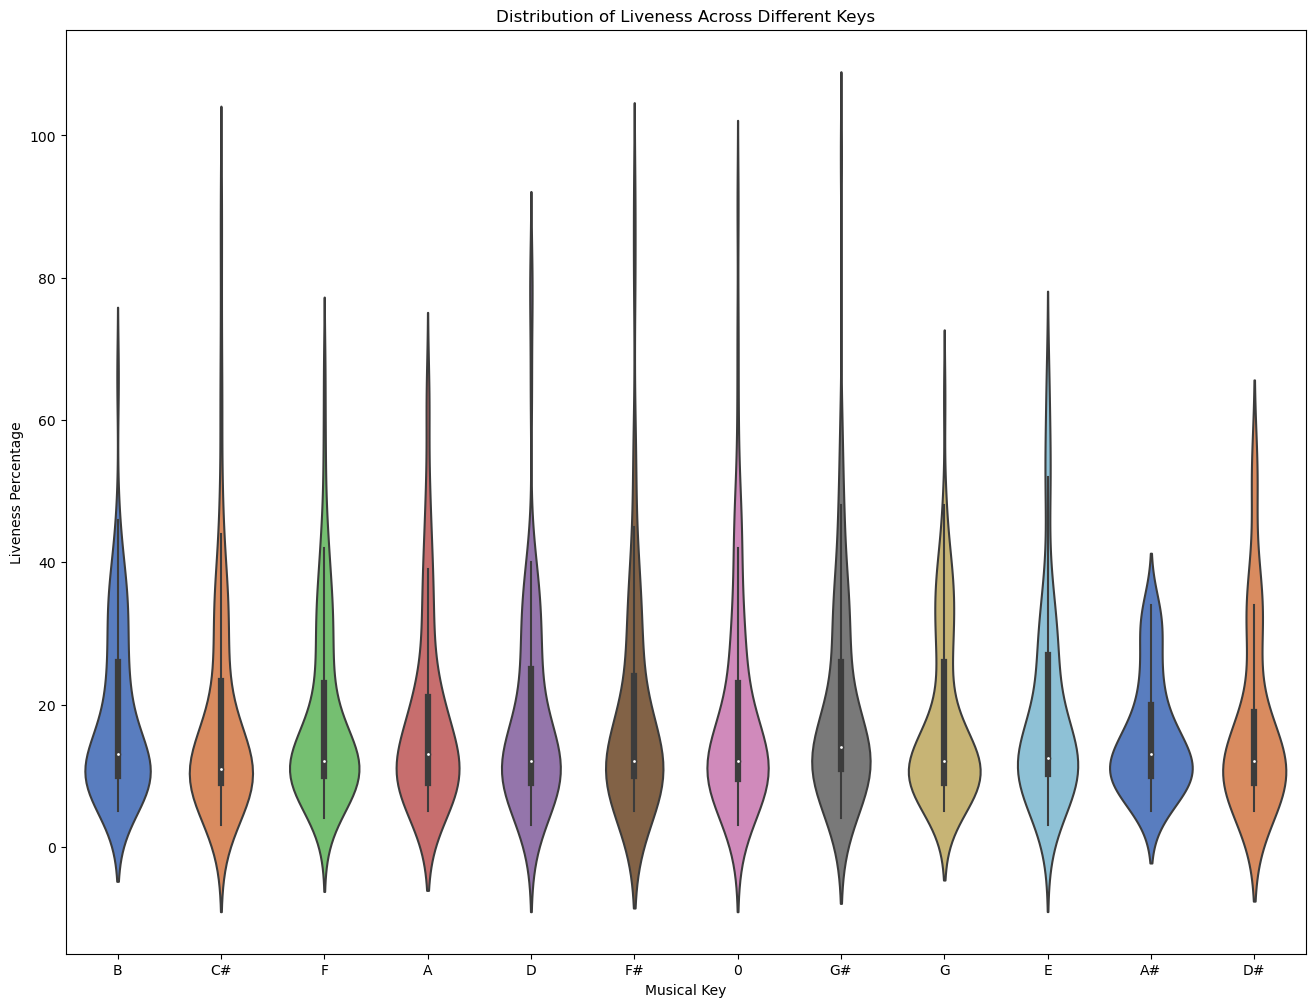

In [30]:


# Assuming you have columns like 'key' and 'liveness_%' in your DataFrame
plt.figure(figsize=(16, 12))
sns.violinplot(x='key', y='liveness_%', data=df, palette='muted')
plt.xlabel('Musical Key')
plt.ylabel('Liveness Percentage')
plt.title('Distribution of Liveness Across Different Keys')
plt.show()


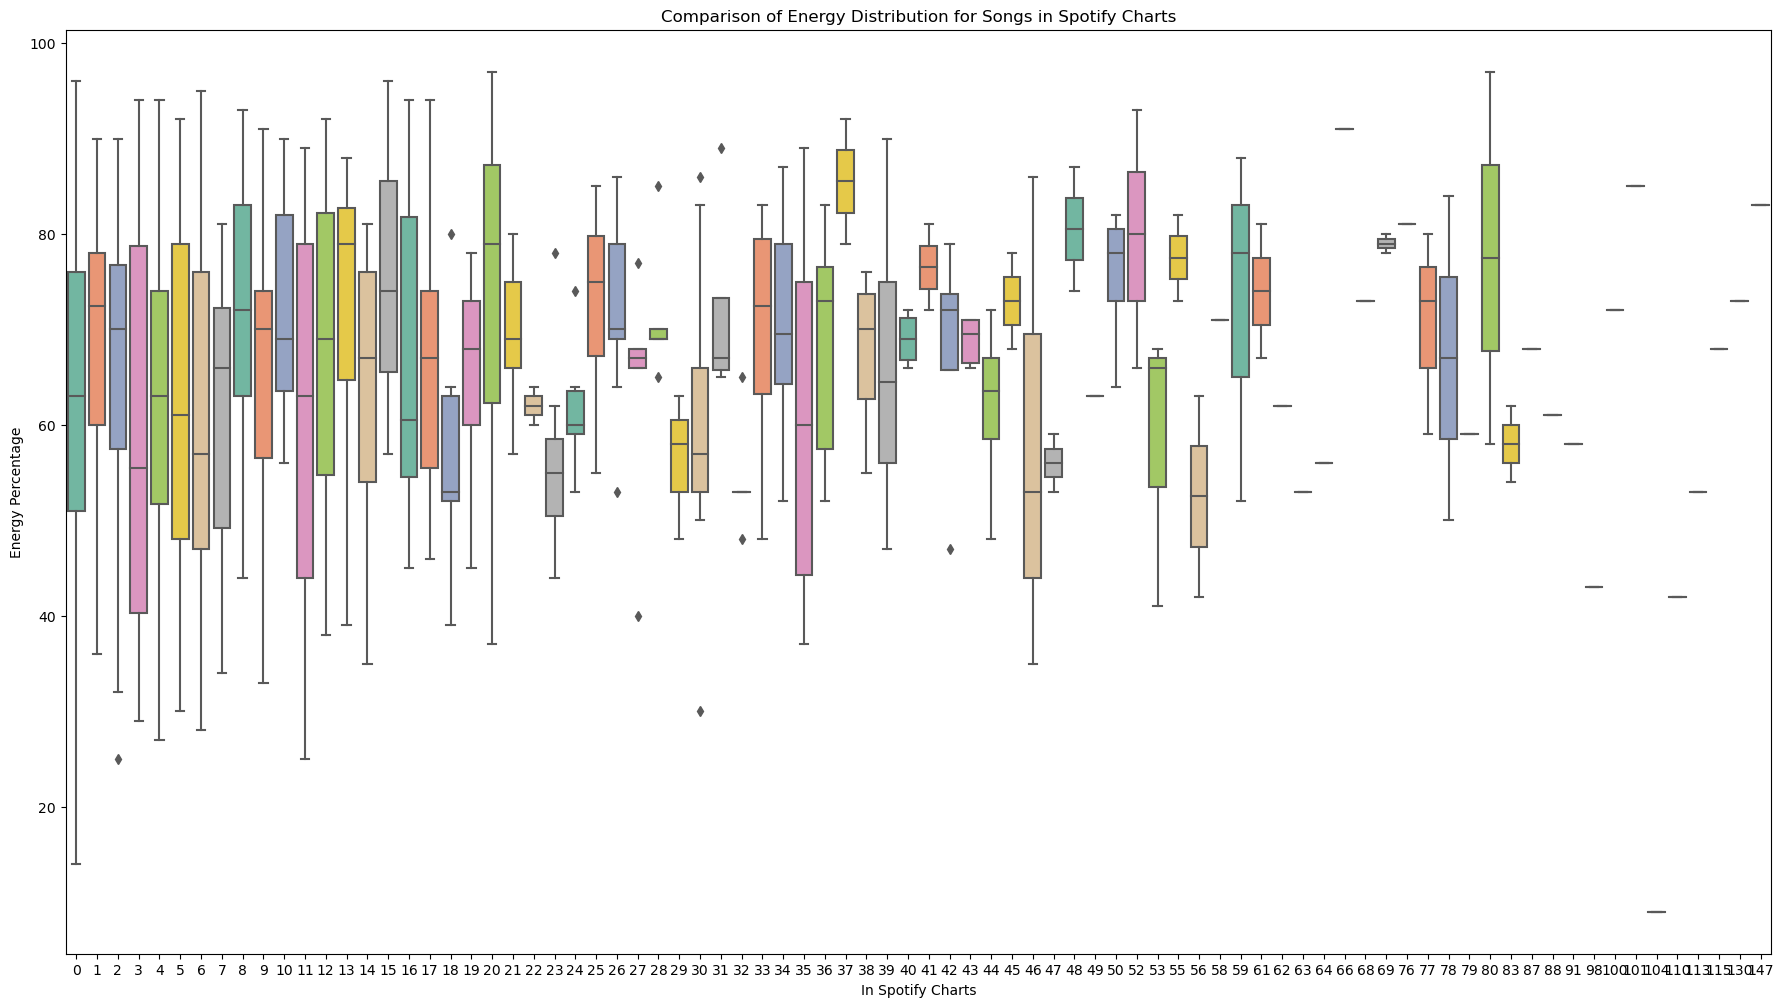

In [31]:


# Assuming you have columns like 'energy_%' and 'in_spotify_charts' in your DataFrame
plt.figure(figsize=(22, 12))
sns.boxplot(x='in_spotify_charts', y='energy_%', data=df, palette='Set2')
plt.xlabel('In Spotify Charts')
plt.ylabel('Energy Percentage')
plt.title('Comparison of Energy Distribution for Songs in Spotify Charts')
plt.show()


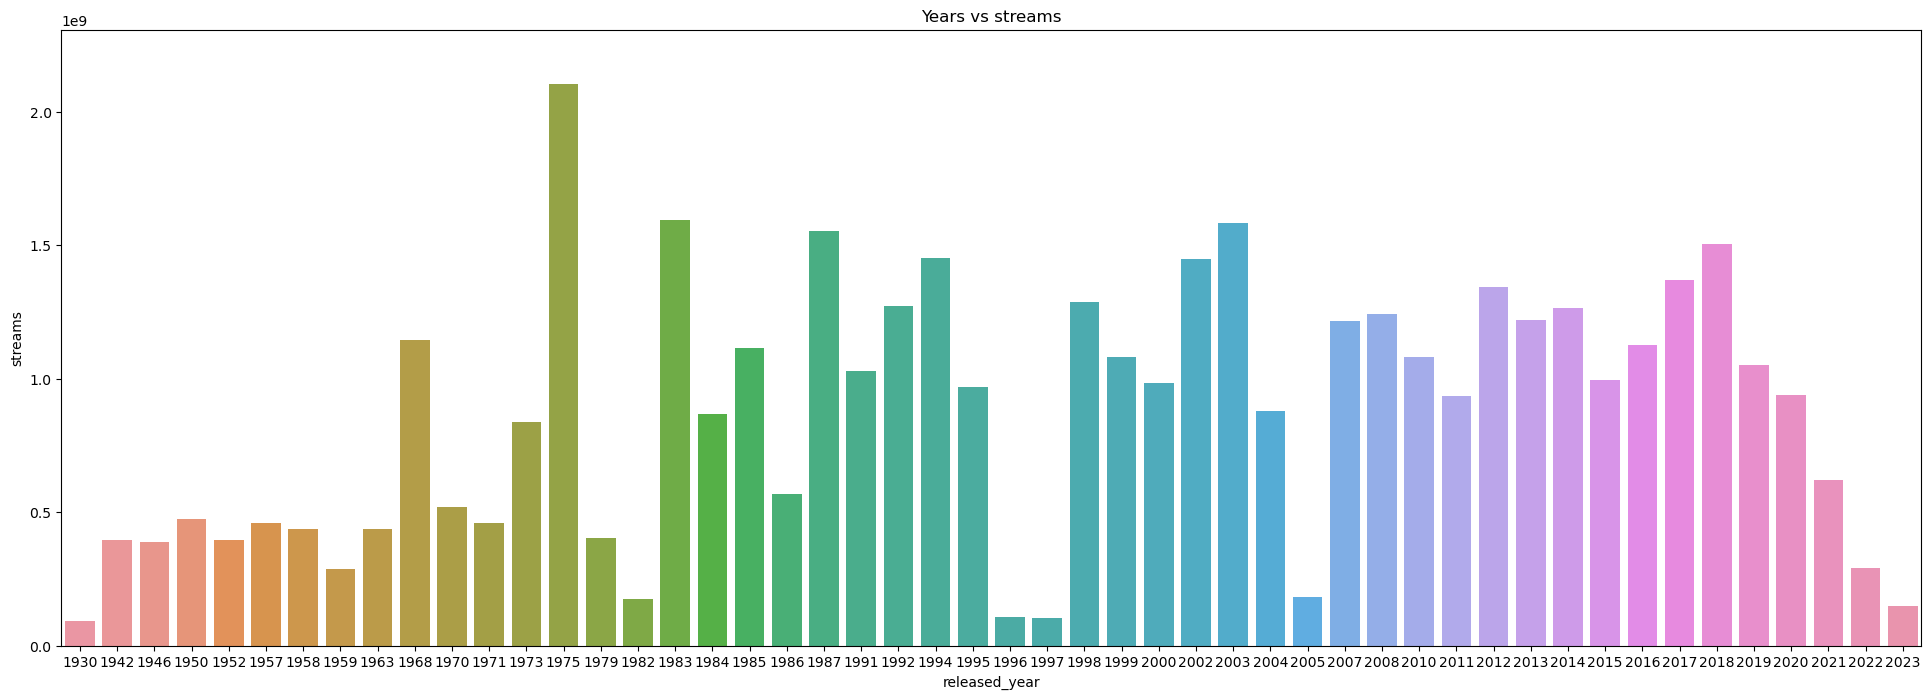

In [32]:

fig_dims = (24,8)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x = 'released_year', y = 'streams', ax = ax,data=df, errwidth = False).set(title='Years vs streams')


<Axes: >

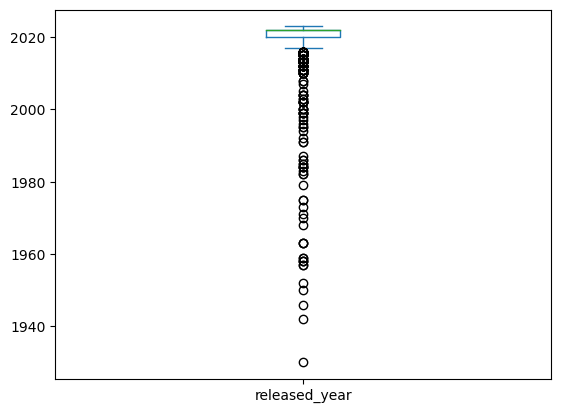

In [33]:
df.released_year.plot.box()